In [1]:
!pip install --upgrade pandas
!pip install pandas

In [61]:
import pandas as pd

# Carregar a base de dados
file_path = 'C:\\Users\\Dell\\Downloads\\Base_B3 SA.csv'
df = pd.read_csv(file_path)

# Exibir as primeiras linhas do dataframe para inspeção
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       352 non-null    object 
 1   Open       352 non-null    float64
 2   High       352 non-null    float64
 3   Low        352 non-null    float64
 4   Close      352 non-null    float64
 5   Adj Close  352 non-null    float64
 6   Volume     352 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 19.4+ KB


(         Date   Open   High    Low  Close  Adj Close    Volume
 0  2023-01-02  12.79  13.04  12.07  12.25  11.742052  36463300
 1  2023-01-03  12.19  12.44  11.64  11.84  11.349053  55579600
 2  2023-01-04  12.10  12.27  11.77  11.93  11.435322  46600300
 3  2023-01-05  12.03  12.38  11.92  12.30  11.789980  42701200
 4  2023-01-06  12.25  12.74  12.24  12.59  12.067955  18701800,
 None)

In [62]:
# Converter a coluna 'Date' para datetime e ordenar o dataframe por data
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Definir a coluna 'Date' como índice
df.set_index('Date', inplace=True)

# Exibir as primeiras linhas do dataframe para confirmar as mudanças
df.head()



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,12.79,13.04,12.07,12.25,11.742052,36463300
2023-01-03,12.19,12.44,11.64,11.84,11.349053,55579600
2023-01-04,12.10,12.27,11.77,11.93,11.435322,46600300
2023-01-05,12.03,12.38,11.92,12.30,11.789980,42701200
2023-01-06,12.25,12.74,12.24,12.59,12.067955,18701800


In [63]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,352.000000,352.000000,352.000000,352.000000,352.000000,3.520000e+02
mean,12.708778,12.904886,12.511619,12.697330,12.426556,4.026979e+07
std,1.243630,1.251848,1.236752,1.246028,1.214321,1.685051e+07
min,10.350000,10.670000,10.130000,10.350000,9.993225,7.965100e+06
25%,11.647500,11.830000,11.470000,11.657500,11.412810,2.938735e+07
50%,12.725000,12.900000,12.530000,12.720000,12.407556,3.738520e+07
75%,13.632500,13.830000,13.405000,13.585000,13.318250,4.737472e+07
max,15.430000,15.520000,14.890000,15.220000,14.794820,1.187538e+08


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     9721.
Date:                Sun, 16 Jun 2024   Prob (F-statistic):          2.05e-257
Time:                        18:35:54   Log-Likelihood:                 14.877
No. Observations:                 352   AIC:                            -25.75
Df Residuals:                     350   BIC:                            -18.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1873      0.127      1.469      0.1

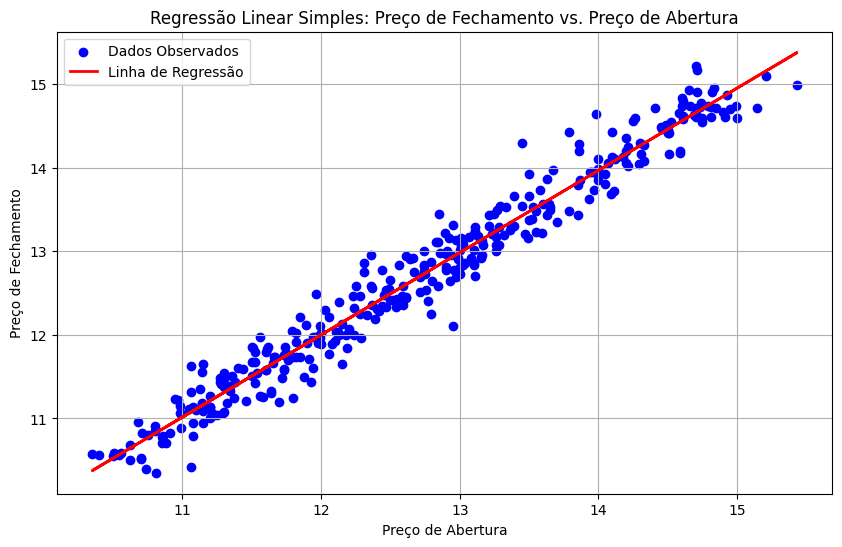


Validação Cruzada (10-fold) com LinearRegression:
RMSE médio: 0.23110269663019217
MAE médio: 0.1799136933130945

Modelo Ridge:
RMSE: 0.1794509376103872
MAE: 0.15150917382048126

Modelo Lasso:
RMSE: 0.18772514054840375
MAE: 0.14849776009446158


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.20234e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [83]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Suponha que 'df' seja seu DataFrame com os dados carregados

# Variável independente (X) e dependente (y)
X = df['Open']  # preço de abertura
y = df['Close']  # preço de fechamento

# Ajustar o modelo de regressão linear
X = sm.add_constant(X)  # adicionar constante para o termo independente (intercepto)
modelo = sm.OLS(y, X)
resultado = modelo.fit()

# Imprimir os resultados da regressão para obter os coeficientes
print(resultado.summary())

# Plotar os dados de dispersão e a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X['Open'], y, color='blue', label='Dados Observados')  # dados de dispersão
plt.plot(X['Open'], resultado.predict(), color='red', linewidth=2, label='Linha de Regressão')  # linha de regressão
plt.title('Regressão Linear Simples: Preço de Fechamento vs. Preço de Abertura')
plt.xlabel('Preço de Abertura')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

# Usar LinearRegression para validação cruzada
lr = LinearRegression()
kf = KFold(n_splits=10, random_state=42, shuffle=True)
cv_rmse = np.sqrt(-cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kf))
cv_mae = -cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kf)

print(f'\nValidação Cruzada (10-fold) com LinearRegression:')
print(f'RMSE médio: {cv_rmse.mean()}')
print(f'MAE médio: {cv_mae.mean()}')

# Regularização com Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_mae = mean_absolute_error(y_test, ridge_pred)

print(f'\nModelo Ridge:')
print(f'RMSE: {ridge_rmse}')
print(f'MAE: {ridge_mae}')

# Regularização com Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_mae = mean_absolute_error(y_test, lasso_pred)

print(f'\nModelo Lasso:')
print(f'RMSE: {lasso_rmse}')
print(f'MAE: {lasso_mae}')


  feature         VIF
0   const  156.743217
1  Volume    1.406103
2    Open   81.394369
3    High  103.280677
4     Low  113.255337
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3285.
Date:                Sun, 16 Jun 2024   Prob (F-statistic):          2.34e-231
Time:                        18:27:58   Log-Likelihood:                 96.258
No. Observations:                 281   AIC:                            -182.5
Df Residuals:                     276   BIC:                            -164.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

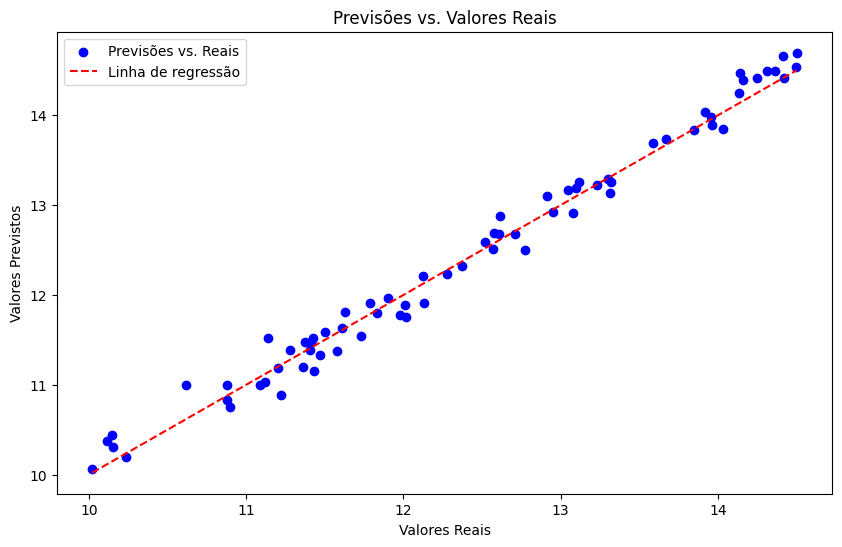


Validação Cruzada (10-fold) com LinearRegression:
RMSE médio: 0.17227194982279725
MAE médio: 0.1392581878704277

Modelo Ridge:
RMSE: 0.16617380395370832
MAE: 0.1376311058571045

Modelo Lasso:
RMSE: 0.19142997780964793
MAE: 0.15083245252882288


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.20234e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Verificar dados faltantes e tratá-los, se necessário
if 'df' in locals() or 'df' in globals():
    df.fillna(df.mean(), inplace=True)
else:
    raise ValueError("DataFrame 'df' não está definido.")

# Definir variáveis independentes (X) e dependente (y)
X = df[['Volume', 'Open', 'High', 'Low']]
y = df['Adj Close']

# Adicionar constante para o termo independente (intercepto)
X = sm.add_constant(X)

# Calcular VIF para verificar multicolinearidade
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear múltipla usando statsmodels
model = sm.OLS(y_train, X_train)
resultado = model.fit()

# Imprimir a tabela de resultados
print(resultado.summary())

# Fazer previsões
y_pred = resultado.predict(X_test)

# Avaliar o modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'\nResultados do Modelo:')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Previsões vs. Reais')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linha de regressão')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.title('Previsões vs. Valores Reais')
plt.show()

# Usar LinearRegression para validação cruzada
lr = LinearRegression()
kf = KFold(n_splits=10, random_state=42, shuffle=True)
cv_rmse = np.sqrt(-cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kf))
cv_mae = -cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kf)

print(f'\nValidação Cruzada (10-fold) com LinearRegression:')
print(f'RMSE médio: {cv_rmse.mean()}')
print(f'MAE médio: {cv_mae.mean()}')

# Regularização com Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_mae = mean_absolute_error(y_test, ridge_pred)

print(f'\nModelo Ridge:')
print(f'RMSE: {ridge_rmse}')
print(f'MAE: {ridge_mae}')

# Regularização com Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_mae = mean_absolute_error(y_test, lasso_pred)

print(f'\nModelo Lasso:')
print(f'RMSE: {lasso_rmse}')
print(f'MAE: {lasso_mae}')


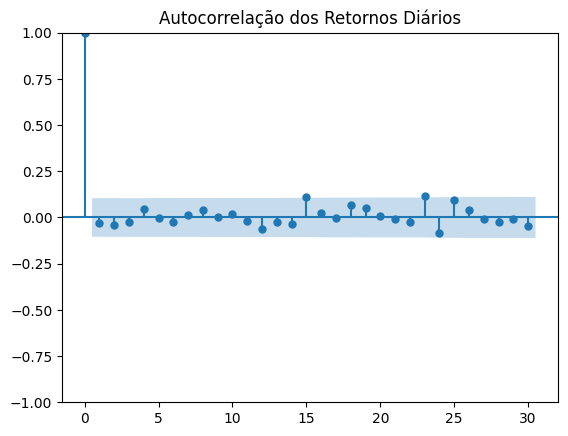

In [76]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Calcular os retornos diários
df['Retorno'] = df['Adj Close'].pct_change()

# Plotar a autocorrelação dos retornos diários
plot_acf(df['Retorno'].dropna(), lags=30)
plt.title('Autocorrelação dos Retornos Diários')
plt.show()

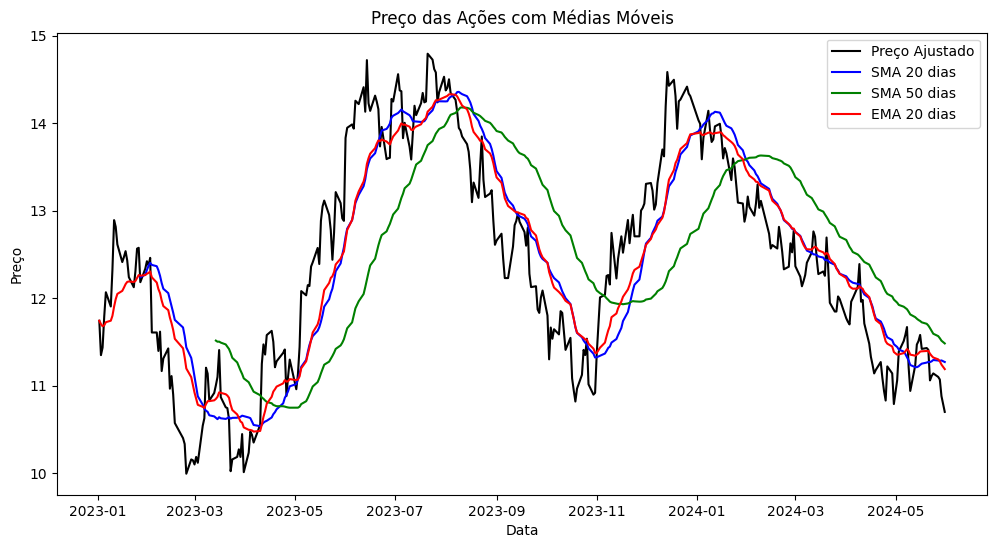

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar a base de dados
df = pd.read_csv('C:\\Users\\Dell\\Downloads\\Base_B3 SA.csv', parse_dates=['Date'], index_col='Date')

# Calcular SMA e EMA
df['SMA_20'] = df['Adj Close'].rolling(window=20).mean()
df['SMA_50'] = df['Adj Close'].rolling(window=50).mean()
df['EMA_20'] = df['Adj Close'].ewm(span=20, adjust=False).mean()

# Plotar os preços com SMA e EMA
plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label='Preço Ajustado', color='black')
plt.plot(df['SMA_20'], label='SMA 20 dias', color='blue')
plt.plot(df['SMA_50'], label='SMA 50 dias', color='green')
plt.plot(df['EMA_20'], label='EMA 20 dias', color='red')
plt.title('Preço das Ações com Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_18540\198643703.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Sinal'][20:] = np.where(df['SMA_20'][20:] > df['SMA_50'][20:], 1, 0)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18540\19864370

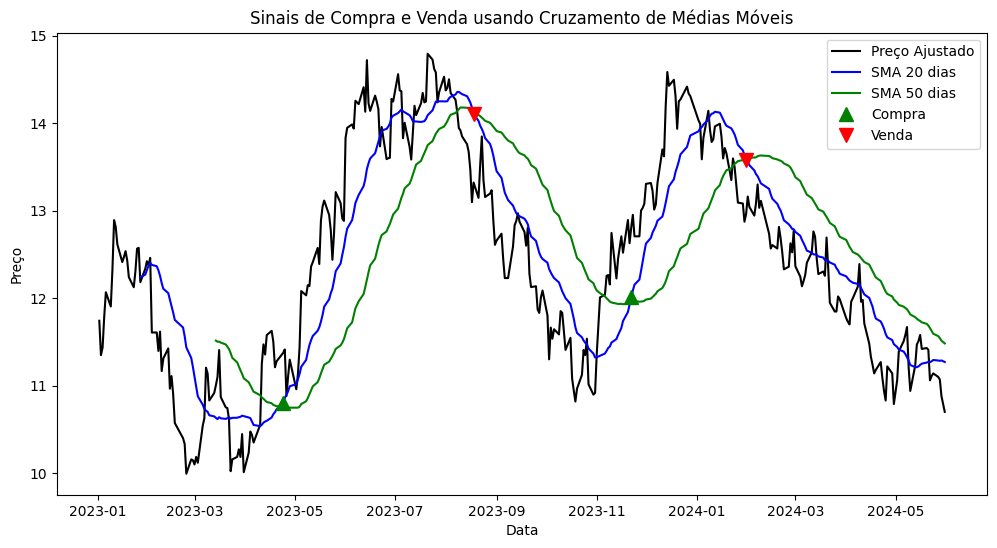

In [51]:
# Definir a estratégia de cruzamento de médias móveis
df['Sinal'] = 0
df['Sinal'][20:] = np.where(df['SMA_20'][20:] > df['SMA_50'][20:], 1, 0)
df['Posição'] = df['Sinal'].diff()

# Plotar os sinais de compra e venda
plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label='Preço Ajustado', color='black')
plt.plot(df['SMA_20'], label='SMA 20 dias', color='blue')
plt.plot(df['SMA_50'], label='SMA 50 dias', color='green')

# Sinais de Compra
plt.plot(df[df['Posição'] == 1].index, 
         df['SMA_20'][df['Posição'] == 1], 
         '^', markersize=10, color='g', lw=0, label='Compra')

# Sinais de Venda
plt.plot(df[df['Posição'] == -1].index, 
         df['SMA_20'][df['Posição'] == -1], 
         'v', markersize=10, color='r', lw=0, label='Venda')

plt.title('Sinais de Compra e Venda usando Cruzamento de Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()